## Deep Neural Network Method

#### Importing Packages

In [46]:
import keras
import tensorflow

# Helper packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

# Modeling process
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder

### Data Processing

In [47]:
data = pd.read_csv('../data/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


##### Since the dataset is categorical, and we want to perform a DNN model, we need to encode the dataset.

In [48]:
le = preprocessing.LabelEncoder()
data_en = data
for i in data_en.columns.tolist():
    data_en[i]= le.fit_transform(data_en[i])
data_en.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


### DNN Modeling

##### Now, we define `Y` to be the __class__ feature, which shows whether a certain mushroom is poisonous or edible based on the other features.
##### Notice that in the definition of the set `X`, the __class__ feature is dropped.

In [49]:

X = data_en.iloc[:,1:23].values
Y = data_en.iloc[:,0].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

#### Next, we initialize our model and add two hidden layers with respective units, 8 and 5, and a `Dropout`* layer and then an output layer.

##### * `The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.`

In [50]:
#Initialising DNN
DNN = tensorflow.keras.models.Sequential()

#Adding First Hidden Layer
DNN.add(tensorflow.keras.layers.Dense(units=8,activation="relu"))

#Adding Second Hidden Layer
DNN.add(tensorflow.keras.layers.Dense(units=5,activation="relu"))

#Adding Dropout Layer
DNN.add(tensorflow.keras.layers.Dropout(0.2,input_shape=(2,)))

#Adding Output Layer
DNN.add(tensorflow.keras.layers.Dense(units=1,activation="sigmoid"))



In [51]:
#Compiling DNN
DNN.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

#### After compiling the model, and before fitting it, it is nice to have an `EarlyStopping`* callback which makes the model stop training when a monitored metric has stopped improving.

##### *Important arguments:
`1- monitor: Quantity to be monitored, such as 'loss' or 'accuracy'.`

`2- min_delta: Minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement.`

`3- patience: Number of epochs with no improvement after which training will be stopped.`

`4- verbose: Verbosity mode, 0 or 1. Mode 0 is silent, and mode 1 displays messages when the callback takes an action.`

In [62]:
#Fitting DNN
my_c = tensorflow.keras.callbacks.EarlyStopping( monitor='loss', patience=2)
DNN.fit(X_train,Y_train,batch_size=32,epochs = 100, callbacks=my_c, verbose=1)

Epoch 1/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0520 - accuracy: 0.9795
Epoch 2/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0504 - accuracy: 0.9785
Epoch 3/100
204/204 [==============================] - 1s 3ms/step - loss: 0.0510 - accuracy: 0.9789
Epoch 4/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0488 - accuracy: 0.9797
Epoch 5/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0520 - accuracy: 0.9785
Epoch 6/100
204/204 [==============================] - 1s 4ms/step - loss: 0.0513 - accuracy: 0.9780


#### Next we interpret how well our model is performing, by investigating the confusion matrix, the classification report, the graph of the `ROC curve`*, and the area under the ROC curve.

##### * `An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds.`

In [63]:
y_pred = DNN.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = DNN.evaluate(X_test, Y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
cm = confusion_matrix(Y_test, y_pred)


51/51 [==============================] - 0s 3ms/step
********************
163/163 [==============================] - 1s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Test score: 0.0018413984216749668
Test accuracy: 1.0


Text(0.5, 15.0, 'Predicted label')

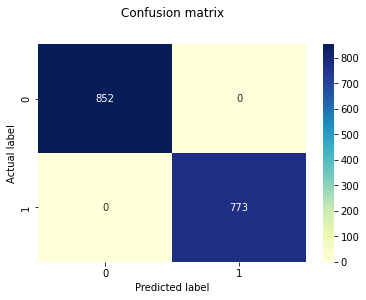

In [64]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [65]:
print(classification_report(Y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       852
           1       1.00      1.00      1.00       773

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



51/51 [==============================] - 0s 2ms/step


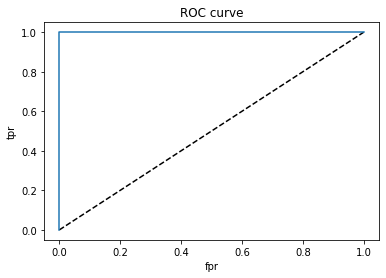

1.0

In [66]:
y_pred_proba = DNN.predict(X_test)
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()
roc_auc_score(Y_test,y_pred_proba)